# Part 1: Optimising functions
    
In this lab we will play with some of the optimisation methods we learned in the lecture by exploring how they work on some analytic functions (both convex and non-convex).

In [ ]:
import torch
import torch.optim as optim

## A Simple Function

For this first task, we are going to try to optimise the following using Stochastic Gradient Descent:

\begin{equation}
min_{\textbf{x}} (\textbf{x}[0] - 5)^2 + \textbf{x}[1]^2 + (\textbf{x}[2] - 1)^2\; ,
\end{equation}

Use the following block the write down the analytic minima of the above function:

### Implement the function

First, complete the following code block to implement the above function using PyTorch:

In [ ]:
def function(x):
     return ((x[0] - 5)**2 + x[1]**2 + (x[2] - 1)**2)

     raise NotImplementedError()

### Optimising

We need two more things before we can start optimising.
We need our initial guess - which we've set to [2.0, 1.0, 10.0] and we need to how many epochs to take.

In [ ]:
p = torch.tensor([2.0, 1.0, 10.0], requires_grad=True)
epochs = 5000

We define the optimisation loop in the standard way:

In [ ]:
opt = optim.SGD([p], lr=0.001)

for i in range(epochs):
    opt.zero_grad()
    output = function(p)
    output.backward()
    opt.step()

Use the following block to print out the final value of `p`. Does it match the value you expected?

In [ ]:
print(p)

#raise NotImplementedError()

tensor([4.9999e+00, 4.4948e-05, 1.0004e+00], requires_grad=True)


## Visualising Himmelblau's Function

We'll now have a go at a more complex example, which we also visualise, with multiple optima; [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function). This is defined as:

\begin{equation}
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2\; ,
\end{equation}
and has minima at
\begin{equation}
f(3, 2) = f(-2.805118, 3.131312) = f(-3.779310, -3.283186) = f(3.584428, -1.848126) = 0\; .
\end{equation}

Use the following block to first define the function (the inputs $x, y$ are packed into a vector as for the previous quadratic function above):

In [ ]:
def himm(x):
    x, y = x[0], x[1]  
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    
    raise NotImplementedError()

The following will plot its surface:

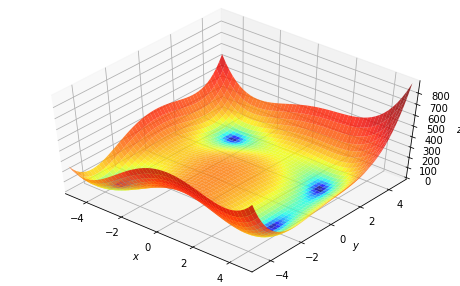

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = himm(torch.tensor([x, y])).numpy()

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

Check that the above plot looks correct  by comparing to the picture on the [Wikipedia page](https://en.wikipedia.org/wiki/Himmelblau%27s_function).

### Optimising

Let's see how it looks for a few different optimisers from a range of starting points

(-5.0, 5.0)

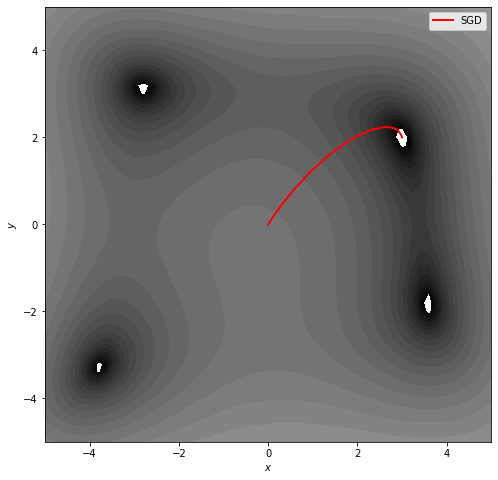

In [ ]:
xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = himm(torch.tensor([x, y])).numpy()

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

p = torch.tensor([[0.0],[0.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)

path = np.empty((2,0))
path = np.append(path, p.data.numpy(), axis=1)

for i in range(50):
    opt.zero_grad()
    output = himm(p)
    output.backward()
    opt.step()
    path = np.append(path, p.data.numpy(), axis=1)

ax.plot(path[0], path[1], color='red', label='SGD', linewidth=2)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

Use the following block to run SGD with momentum (lr=0.01, momentum=0.9) from the same initial point, saving the position at each timestep into a variable called `path_mom`.

In [ ]:
p = torch.tensor([[0.0],[0.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum=0.9)

for i in range(50):
    opt.zero_grad()
    output = himm(p)
    output.backward()
    opt.step()
    path_mom = np.append(path, p.data.numpy(), axis=1)

#raise NotImplementedError()

The following will plot the path taken when momentum was used, as well as the original plain SGD path:

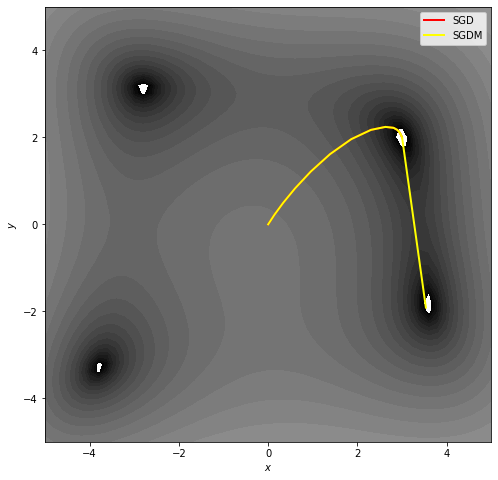

In [ ]:
ax.plot(path_mom[0], path_mom[1], color='yellow', label='SGDM', linewidth=2)
ax.legend()
fig

Now explore what happens when you start from different points. What effect do you get with different optimisers? 

torch.Size([1])


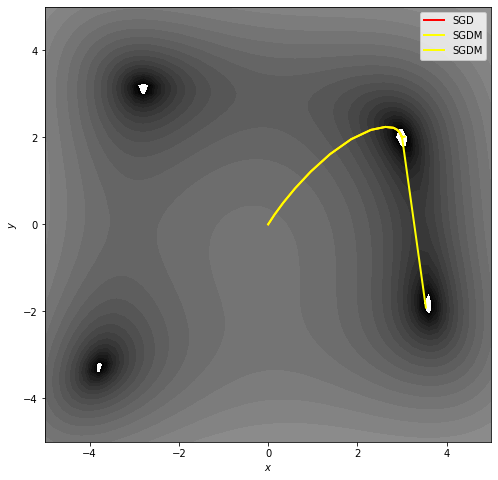

In [ ]:
p = torch.tensor([[2.0],[4.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum=0.9)



for i in range(50):
    opt.zero_grad()
    output = himm(p)
    output.backward()
    opt.step()
    path_mom = np.append(path, p.data.numpy(), axis=1)


ax.plot(path_mom[0], path_mom[1], color='yellow', label='SGDM', linewidth=2)
ax.legend()
fig